In [30]:
import numpy as np

import scipy.constants as cs
from scipy.optimize import curve_fit
import scipy.ndimage as ndimage
from ImageProcessing import *

import matplotlib.pyplot as plt
import matplotlib.scale as scale

import tqdm
import scipy.io

import csv

In [31]:
data = scipy.io.loadmat('jun1_run9.mat')
n_loops = 20
lattice_shape = np.array([10, 10])
stack = data['stack']

80


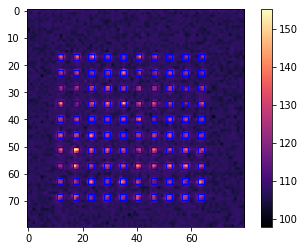

In [32]:
img = GreenImageProcessor(stack, lattice_shape, 20)
print(img.img_width)
img.plot()
crops, labels = img.crop_images(1)

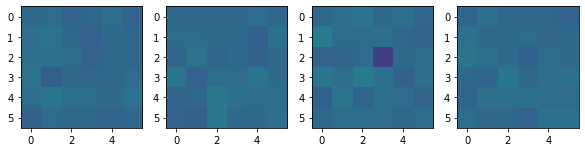

In [25]:
i, j, k = np.random.randint(img.n_tweezers), np.random.randint(img.n_loops), np.random.randint(img.per_loop - 4)

fig, axs = plt.subplots(1, 4, figsize=(10, 20))

for n in range(4):
    axs[n].imshow(crops[img.crop_index(i, j, k + n)], vmin=img.stack.min(), vmax=img.stack.max())

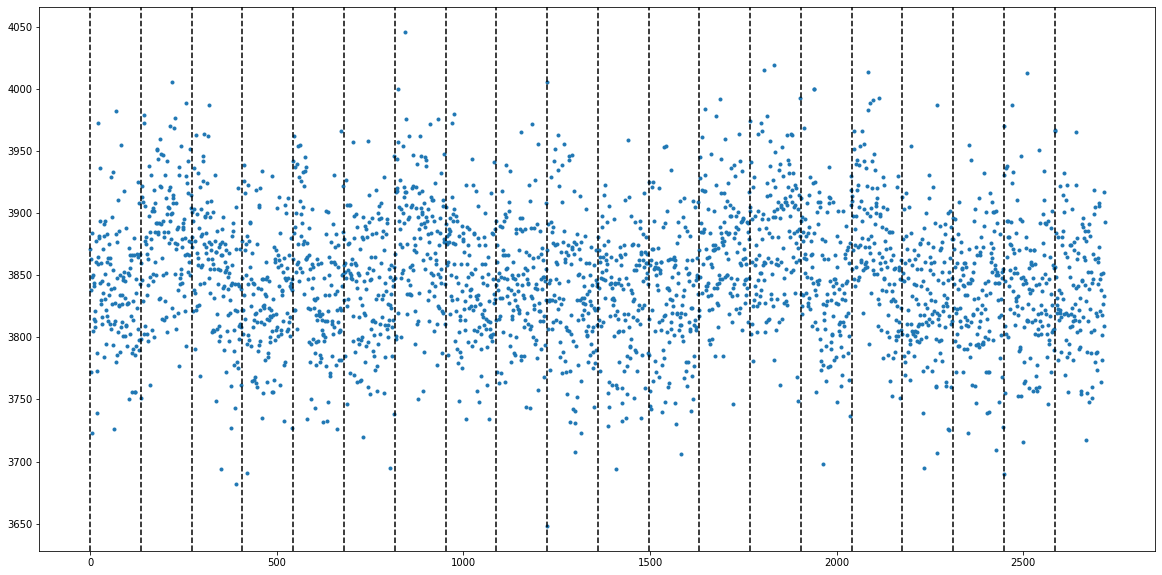

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(np.sum(crops[img.crop_index(i, 0, 0): img.crop_index(i + 1, 0, 0) - 1], axis=(1, 2)), '.')
for i in range(n_loops):
    plt.axvline(i * img.per_loop, color='k', linestyle='--')